# ICA analysis 

In [1]:
%matplotlib notebook
#%matplotlib inline

In [2]:
import mne
import os.path as op
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [3]:
#Load data
data_path = '/net/server/data/Archive/speech_learn/meg'
raw_file = op.join(data_path, 'L001/191105/L001_day1_1_passive1_raw_tsss_mc_trans.fif')
raw = mne.io.Raw(raw_file, preload=True)

Opening raw data file /net/server/data/Archive/speech_learn/meg/L001/191105/L001_day1_1_passive1_raw_tsss_mc_trans.fif...
    Range : 0 ... 902999 =      0.000 ...   902.999 secs
Ready.
Current compensation grade : 0
Reading 0 ... 902999  =      0.000 ...   902.999 secs...


<ipython-input-3-d1d929638eeb>:4: RuntimeWarning: This filename (/net/server/data/Archive/speech_learn/meg/L001/191105/L001_day1_1_passive1_raw_tsss_mc_trans.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw = mne.io.Raw(raw_file, preload=True)


1. Compute rank

In [5]:
rank = mne.compute_rank(raw)

# Note 
'''
RuntimeWarning: Что-то пошло не так в управляемой данными оценке ранга данных,
так как он превышает теоретический ранг из информации (306> 69). 
Рассмотрите возможность установки для ранга «auto» или явного целочисленного значения.

RuntimeWarning: Something went wrong in the data-driven estimation of the data 
rank as it exceeds the theoretical rank from the info (306 > 69). 
Consider setting rank to "auto" or setting it explicitly as an integer.

'''

Computing rank from data with rank=None
    Using tolerance 2.4e-10 (2.2e-16 eps * 306 dim * 3.5e+03  max singular value)
    Estimated rank (mag + grad): 306
    MEG: rank 306 computed from 306 data channels with 0 projectors


<ipython-input-5-7cfa7b2dcbd5>:1: RuntimeWarning: Something went wrong in the data-driven estimation of the data rank as it exceeds the theoretical rank from the info (306 > 69). Consider setting rank to "auto" or setting it explicitly as an integer.
  rank = mne.compute_rank(raw)


In [4]:
rank = mne.compute_rank(raw, rank='info')
rank = int(rank['meg'])

Computing rank from data with rank='info'
    MEG: rank 69 after 0 projectors applied to 306 channels


2. Plot Raw with eyes movements as Events  
In order to see eyes movements on raw data, you should primarily look at frontal channels 

https://mne.tools/dev/generated/mne.preprocessing.find_eog_events.html

Using channel EOG062 as EOG channel
EOG channel index for this subject is: [307]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 16384 samples (16.384 sec)

Now detecting blinks and generating corresponding events
Found 254 significant peaks
Number of EOG events detected : 254


<IPython.core.display.Javascript object>


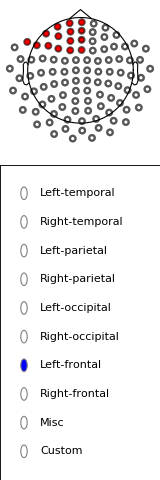

<IPython.core.display.Javascript object>


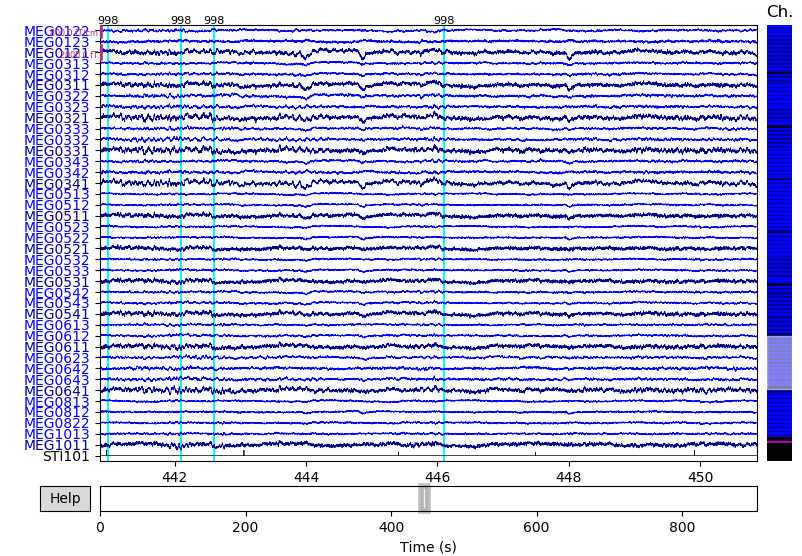

In [5]:
eog_events_h = mne.preprocessing.find_eog_events(raw, event_id=998, ch_name='EOG062') #horisontal movements
raw.plot(events=eog_events_h,  group_by ='position');

Using channel EOG061 as EOG channel
EOG channel index for this subject is: [306]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 16384 samples (16.384 sec)

Now detecting blinks and generating corresponding events
Found 210 significant peaks
Number of EOG events detected : 210


<IPython.core.display.Javascript object>


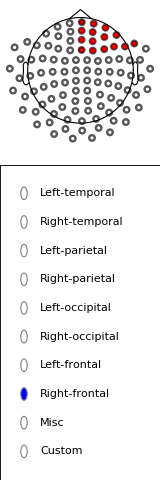

<IPython.core.display.Javascript object>


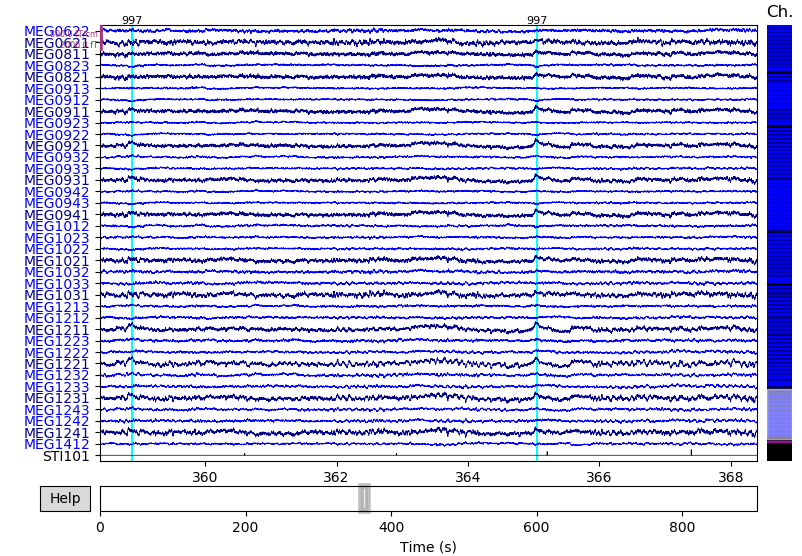

In [6]:
eog_events_v = mne.preprocessing.find_eog_events(raw, event_id=997, ch_name='EOG061') #vertical movements
raw.plot(events=eog_events_v, group_by ='position');

One more usefull function to plot blink (and not only) as event is mne.Annotation.   
see https://mne.tools/stable/generated/mne.Annotations.html for details.

#### Only frontal channels  

If it is necessary only channels with corresponding numbers ca be plot


In [7]:
#in this example I have Excel file with numbers of channels
channels = pd.read_excel('/home/vtretyakova/Desktop/New_experiment/Sensors_groups.xlsx', 
                         header = None, index_col = 0)

In [9]:
#This step is necessary to bring Excel datato desired form
Left_frontal = channels.loc['Left-frontal'].tolist()
Right_frontal = channels.loc['Right-frontal'].tolist()
frontal = Left_frontal + Right_frontal

frontal_chan = []
for i in frontal:
    a = i.split('\'')
    b = a[1].replace(' ', '')
    frontal_chan.append(b)
    
frontal_chan[0]   

'MEG0522'

Make NumPy array with indexes of necessary channels. Take indexes from raw.info

In [10]:
channels_exp = raw.info['ch_names']

index_chan = []
for idx, ch in enumerate(channels_exp):
    if ch in frontal_chan:
        index_chan.append(idx)
        
index_chan = np.array(index_chan)        

Using channel EOG061 as EOG channel
EOG channel index for this subject is: [306]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 16384 samples (16.384 sec)

Now detecting blinks and generating corresponding events
Found 210 significant peaks
Number of EOG events detected : 210


<IPython.core.display.Javascript object>


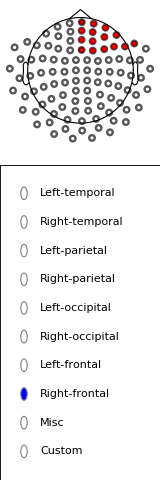

<IPython.core.display.Javascript object>


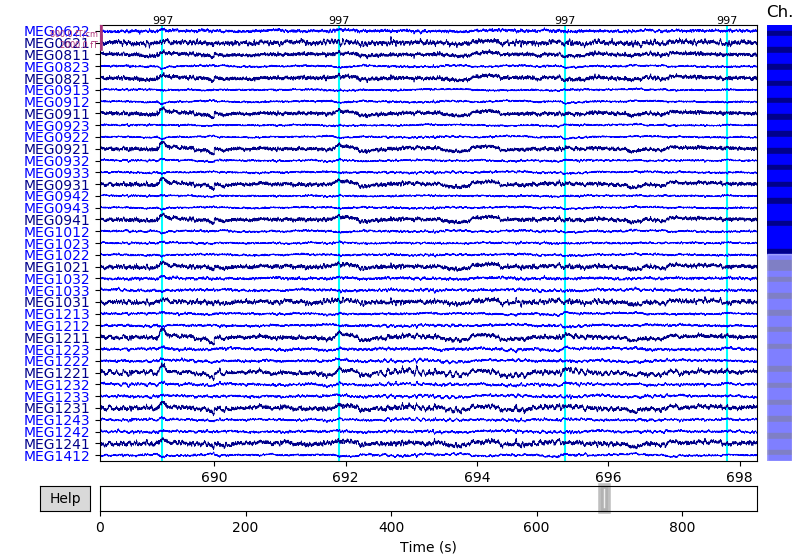

In [11]:
eog_events_v = mne.preprocessing.find_eog_events(raw, event_id=997, ch_name='EOG061') #vertical
raw.plot(events=eog_events_v, order = index_chan, group_by ='position');

3. Plot Raw with Heard beats as Events  
https://mne.tools/stable/generated/mne.preprocessing.find_ecg_events.html  
!!!
Note: the type of ecg_event is tuple because this function return array with events, Name of channel used and Estimated average pulse. Be careful, because for raw.plot we need only array.
!!!
In order to see heard beats on raw data, you should primarily look at temporal channels 


Using channel ECG063 to identify heart beats.
Setting up band-pass filter from 5 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 35.25 Hz)
- Filter length: 16384 samples (16.384 sec)

Number of ECG events detected : 998 (average pulse 66 / min.)


<IPython.core.display.Javascript object>


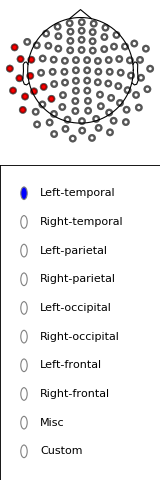

<IPython.core.display.Javascript object>


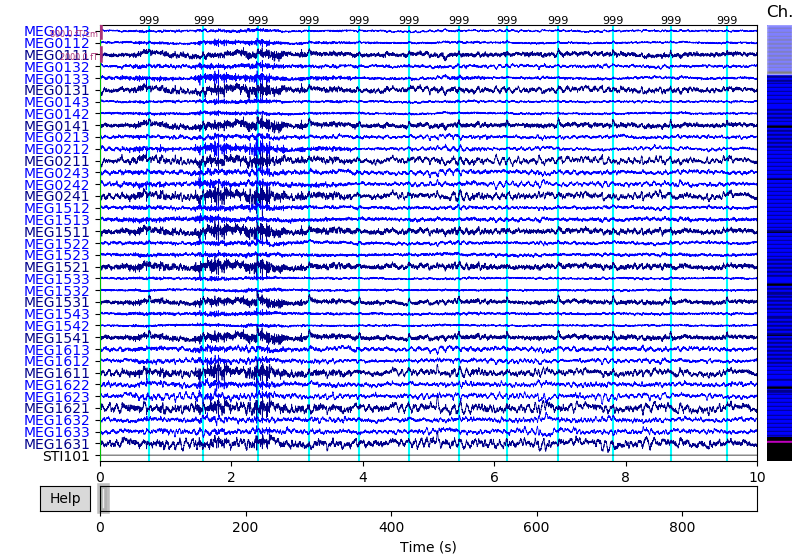

In [12]:
ecg_events = mne.preprocessing.find_ecg_events(raw, event_id=999, ch_name='ECG063')[0]
raw.plot(events=ecg_events, group_by ='position');

4. Plot sensors on Topo to understad location of sensor which signal have effects we looking for

<IPython.core.display.Javascript object>


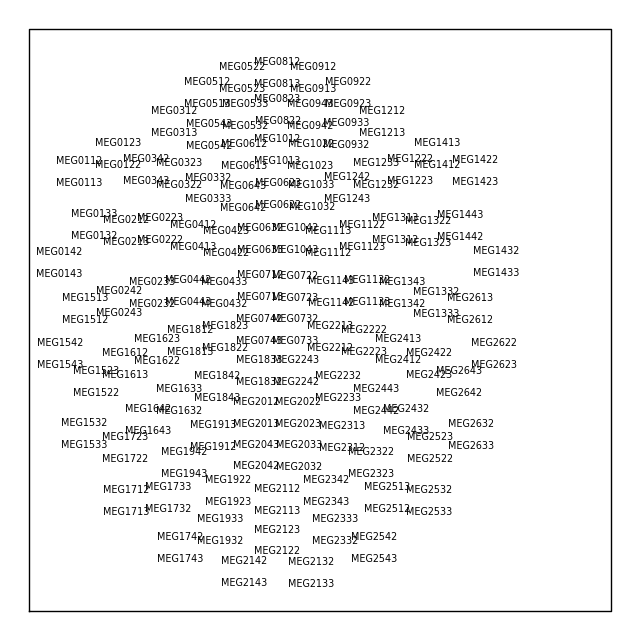

In [7]:
grad = mne.channels.find_layout(raw.info, ch_type = 'grad').plot();
grad.savefig('/home/vtretyakova/Desktop/New_experiment/grad.jpeg')

<IPython.core.display.Javascript object>


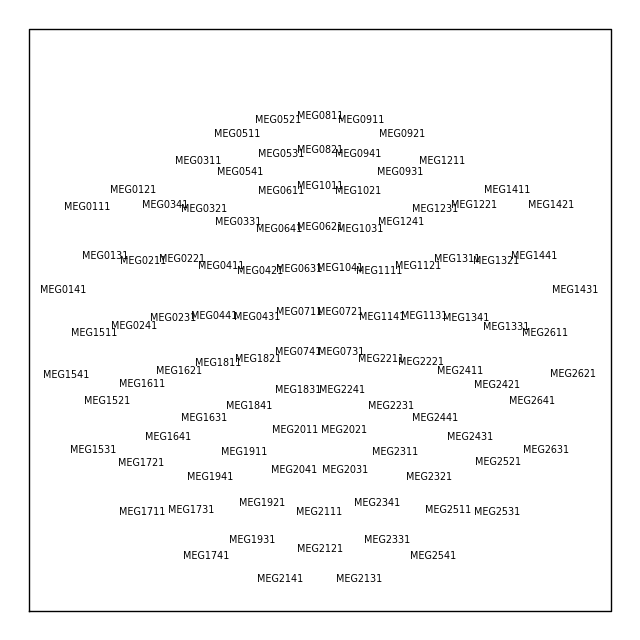

In [8]:
mag = mne.channels.find_layout(raw.info, ch_type = 'mag').plot();
mag.savefig('/home/vtretyakova/Desktop/New_experiment/mag.jpeg')

5. ICA Analisis  

https://mne.tools/dev/generated/mne.preprocessing.ICA.html  
https://mne.tools/stable/auto_tutorials/preprocessing/plot_40_artifact_correction_ica.html#ica-in-mne-python

In [13]:
#%matplotlib inline
from mne.preprocessing import ICA
from mne.preprocessing import create_eog_epochs, create_ecg_epochs

If we want to see how blinks and heard beats components will look like, we can use plot_joint option  
https://mne.tools/0.11/generated/mne.preprocessing.create_eog_epochs.html  
https://mne.tools/dev/generated/mne.preprocessing.create_ecg_epochs.html

EOG channel index for this subject is: [306 307]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 16384 samples (16.384 sec)

Now detecting blinks and generating corresponding events
Found 210 significant peaks
Number of EOG events detected : 210
210 matching events found
No baseline correction applied
Not setting metadata
Loading data for 210 events and 1001 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)


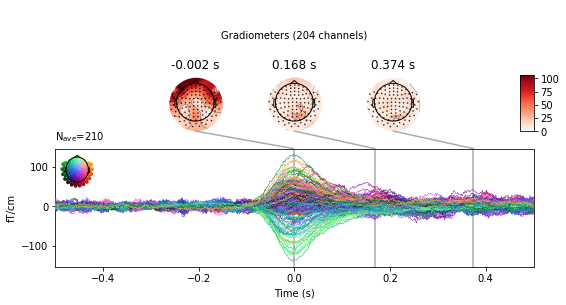

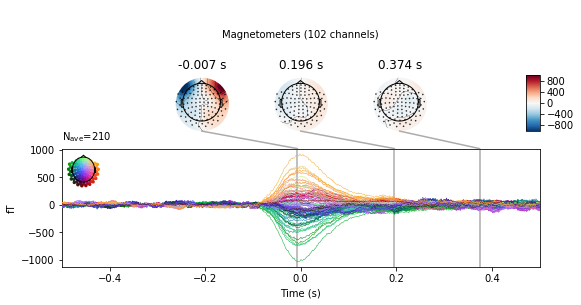

[<Figure size 576x302.4 with 7 Axes>, <Figure size 576x302.4 with 7 Axes>]

In [11]:
eog_evoked = create_eog_epochs(raw).average()
eog_evoked.apply_baseline(baseline=(-0.6, -0.2))
eog_evoked.plot_joint()

Using channel ECG063 to identify heart beats.
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 16384 samples (16.384 sec)

Number of ECG events detected : 999 (average pulse 66 / min.)
999 matching events found
No baseline correction applied
Not setting metadata
Loading data for 999 events and 1001 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)


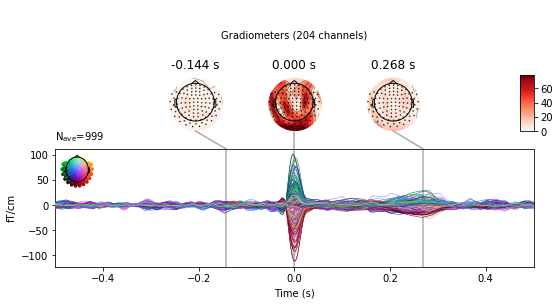

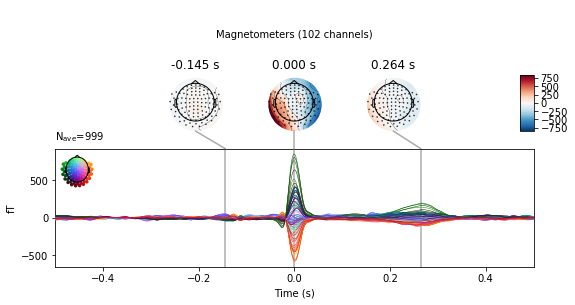

[<Figure size 576x302.4 with 7 Axes>, <Figure size 576x302.4 with 7 Axes>]

In [27]:
ecg_evoked = create_ecg_epochs(raw).average()
ecg_evoked.apply_baseline(baseline=(-0.6, -0.2))
ecg_evoked.plot_joint()

Plot PSD to understand line-noise frequency (multiple of 50 or 60 for example)

Effective window size : 2.048 (s)
Effective window size : 2.048 (s)


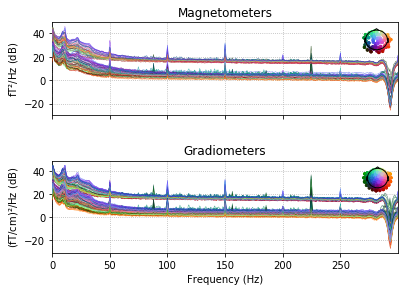

In [10]:
picks_meg = mne.pick_types(raw.info, meg=True, eeg=False, eog=False,
                           stim=False, exclude=[])

raw.plot_psd(area_mode='range', tmax=np.inf, fmax=300, average=False);

50, 100, 150, 200, 250 Hz - related to power - line noise.  
We can use notch filter to drop this from data

In [15]:
raw.notch_filter(np.arange(50, 201, 50), filter_length='auto', phase='zero')

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 sec)



<Raw | L001_day1_1_passive1_raw_tsss_mc_trans.fif, 323 x 903000 (903.0 s), ~2.17 GB, data loaded>

Select the frequency range you are intrested in

In [16]:
raw.filter(1., 50., fir_design='firwin')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 3301 samples (3.301 sec)



<Raw | L001_day1_1_passive1_raw_tsss_mc_trans.fif, 323 x 903000 (903.0 s), ~2.17 GB, data loaded>

In [17]:
n_components = rank  
method = 'fastica'  
decim = 3  # we need sufficient statistics, not all time points -> saves time
random_state = 23

In [18]:
ica = ICA(n_components=n_components, method=method, random_state=random_state, allow_ref_meg=False)

We avoid fitting ICA on crazy environmental artifacts that would dominate the variance and decomposition

In [19]:
reject = dict(mag=9e-12, grad=4e-10) 
ica.fit(raw, picks=None, decim=decim, reject=reject)

Fitting ICA to data using 306 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 69 components
Fitting ICA took 36.2s.


<ICA  |  raw data decomposition, fit (fastica): 300817 samples, 69 components, channels used: "mag"; "grad">

<IPython.core.display.Javascript object>


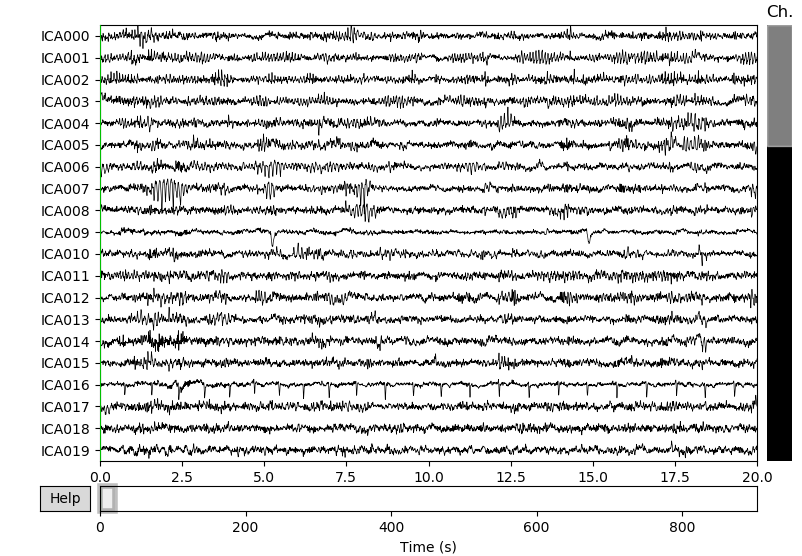

In [20]:
sources = ica.plot_sources(raw);

We can tentatively say that component 9 corresponds to blinking and 16 - to heard beats. The same can be said if you look at the topography

<IPython.core.display.Javascript object>


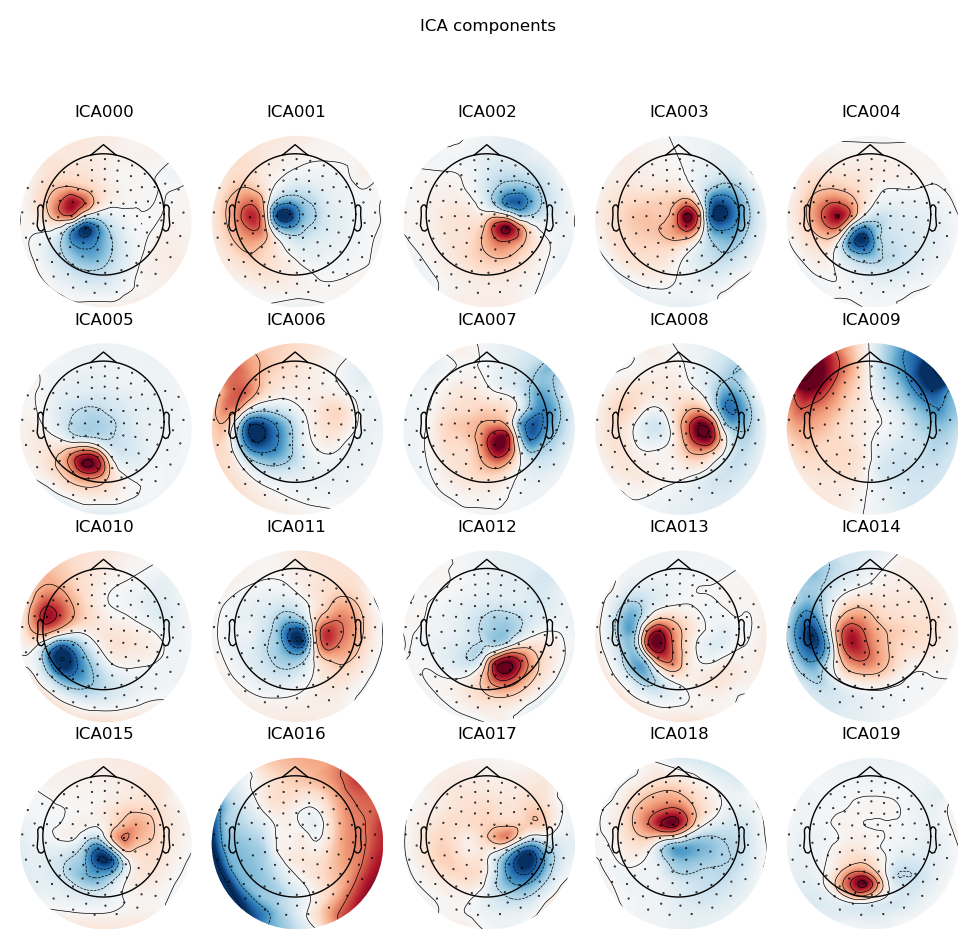

<IPython.core.display.Javascript object>


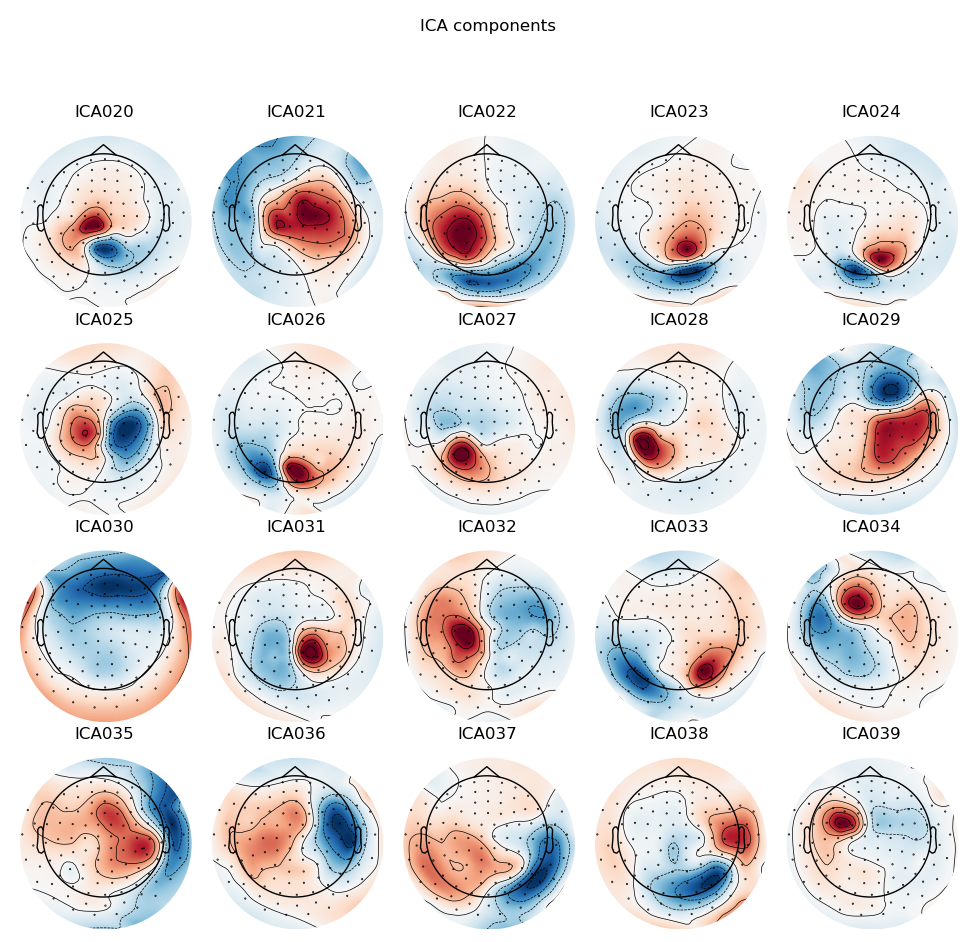

<IPython.core.display.Javascript object>


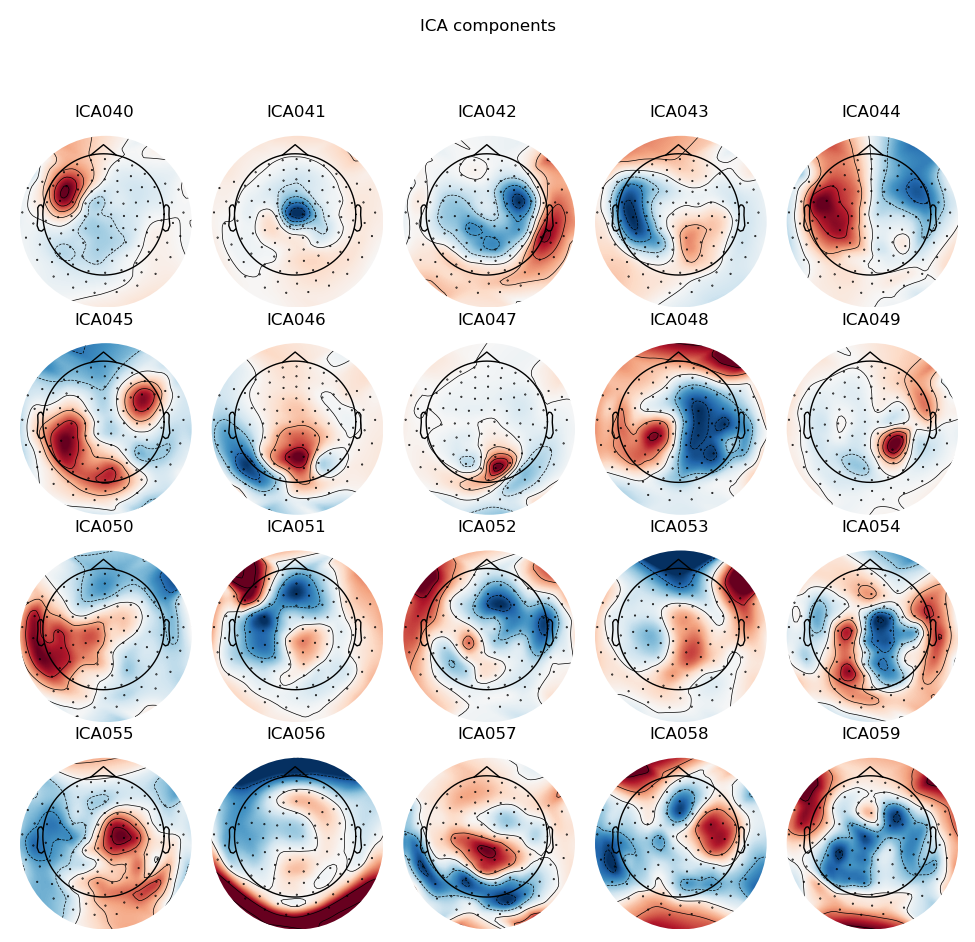

<IPython.core.display.Javascript object>


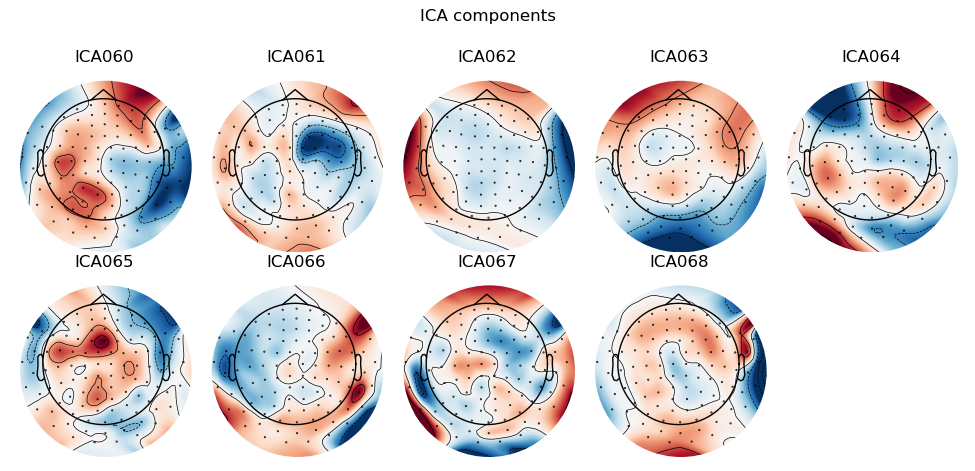

In [21]:
ica_comp_L001 = ica.plot_components();

https://mne.tools/stable/auto_tutorials/preprocessing/plot_40_artifact_correction_ica.html

From score we can see, that components have not really high correlation with EOG sensors, so we can make threshold a little higher, and this componets will not pass.

In [22]:
eog_epochs_h = create_eog_epochs(raw, ch_name='EOG062', event_id=998, reject=reject)  # get single EOG trials
eog_inds_h, scores_h = ica.find_bads_eog(eog_epochs_h, ch_name='EOG062', threshold=5.0)  # find via correlation

print(ica.labels_)

Using channel EOG062 as EOG channel
EOG channel index for this subject is: [307]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 16384 samples (16.384 sec)

Now detecting blinks and generating corresponding events
Found 254 significant peaks
Number of EOG events detected : 254
254 matching events found
No baseline correction applied
Not setting metadata
Loading data for 254 events and 1001 original time points ...
0 bad epochs dropped
Using channel EOG062 as EOG channel
{'eog/0/EOG062': [30], 'eog': [30

<IPython.core.display.Javascript object>


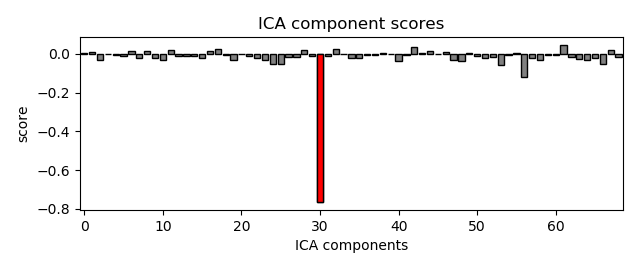

In [23]:
score_eog_h = ica.plot_scores(scores_h, exclude=eog_inds_h); 

<IPython.core.display.Javascript object>


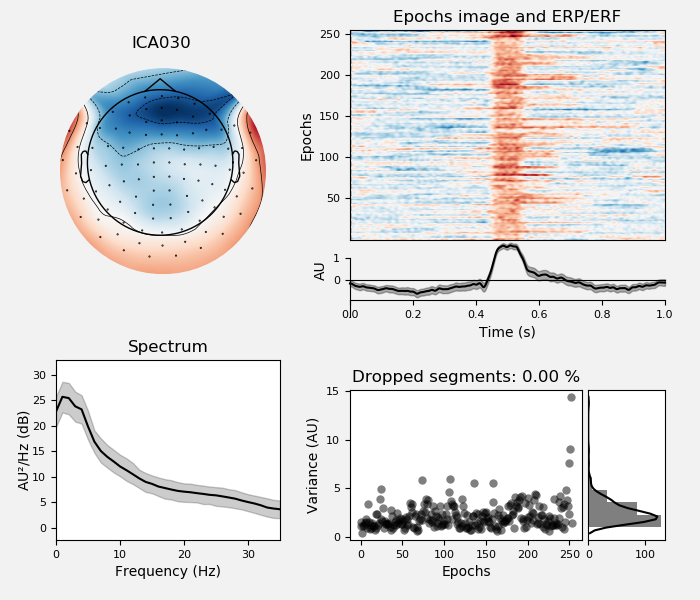

    Using multitaper spectrum estimation with 7 DPSS windows
254 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


In [24]:
properties_h = ica.plot_properties(eog_epochs_h, picks=eog_inds_h, psd_args={'fmax': 35.}, image_args={'sigma': 1.})

Transforming to ICA space (69 components)
Zeroing out 1 ICA component


<IPython.core.display.Javascript object>


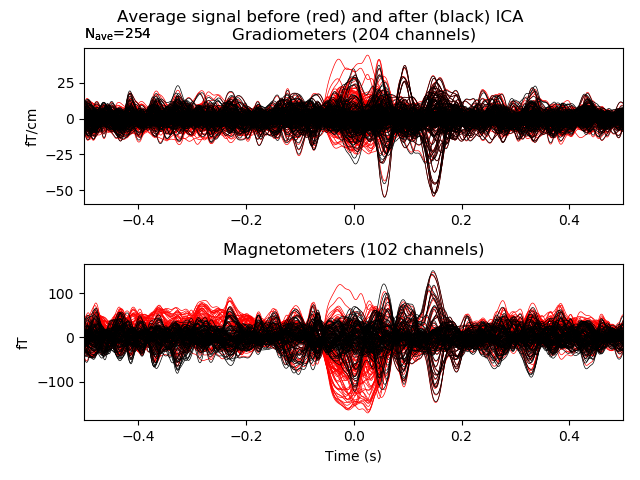

In [25]:
eog_average_h = eog_epochs_h.average()
ica.plot_overlay(eog_average_h, exclude=eog_inds_h, show=False);

In [26]:
eog_epochs_v = create_eog_epochs(raw, ch_name='EOG061', event_id=997, reject=reject)  # get single EOG trials
eog_inds_v, scores_v = ica.find_bads_eog(eog_epochs_v, ch_name='EOG061', threshold=5.0)  # find via correlation

print(ica.labels_)

Using channel EOG061 as EOG channel
EOG channel index for this subject is: [306]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 16384 samples (16.384 sec)

Now detecting blinks and generating corresponding events
Found 210 significant peaks
Number of EOG events detected : 210
210 matching events found
No baseline correction applied
Not setting metadata
Loading data for 210 events and 1001 original time points ...
0 bad epochs dropped
Using channel EOG061 as EOG channel
{'eog/0/EOG062': [30], 'eog': [9]

<IPython.core.display.Javascript object>


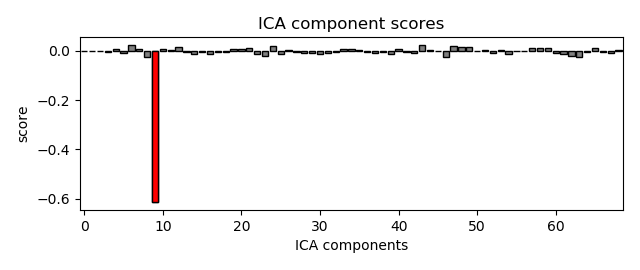

In [27]:
score_eog_v = ica.plot_scores(scores_v, exclude=eog_inds_v); 

<IPython.core.display.Javascript object>


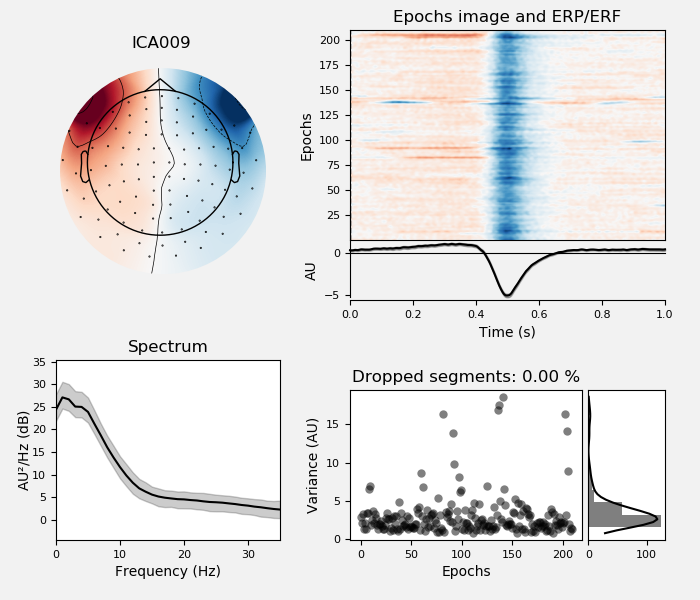

    Using multitaper spectrum estimation with 7 DPSS windows
210 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


In [28]:
properties_v = ica.plot_properties(eog_epochs_v, picks=eog_inds_v, psd_args={'fmax': 35.}, image_args={'sigma': 1.})

Transforming to ICA space (69 components)
Zeroing out 1 ICA component


<IPython.core.display.Javascript object>


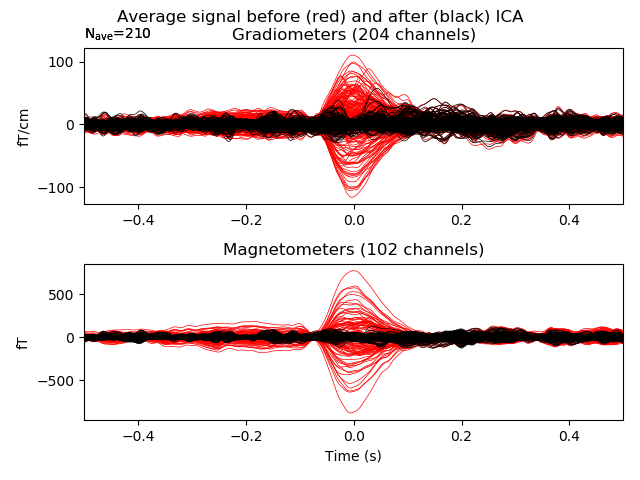

In [29]:
eog_average_v = eog_epochs_v.average()
ica.plot_overlay(eog_average_v, exclude=eog_inds_v, show=False);

In [30]:
#ECG
ecg_epochs = create_ecg_epochs(raw, tmin=-.5, tmax=.5, reject=reject)
ecg_inds, scores = ica.find_bads_ecg(ecg_epochs, method='ctps')
print(ica.labels_)

Using channel ECG063 to identify heart beats.
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 16384 samples (16.384 sec)

Number of ECG events detected : 999 (average pulse 66 / min.)
999 matching events found
No baseline correction applied
Not setting metadata
Loading data for 999 events and 1001 original time points ...
0 bad epochs dropped
{'eog/0/EOG062': [30], 'eog': [9], 'eog/0/EOG061': [9], 'ecg': [16], 'ecg/ECG-MAG': [16]}


<IPython.core.display.Javascript object>


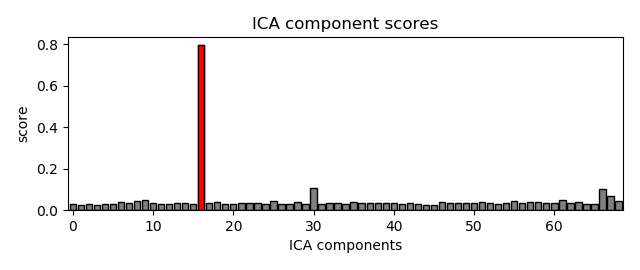

In [31]:
score_ecg = ica.plot_scores(scores, exclude=ecg_inds); 

<IPython.core.display.Javascript object>


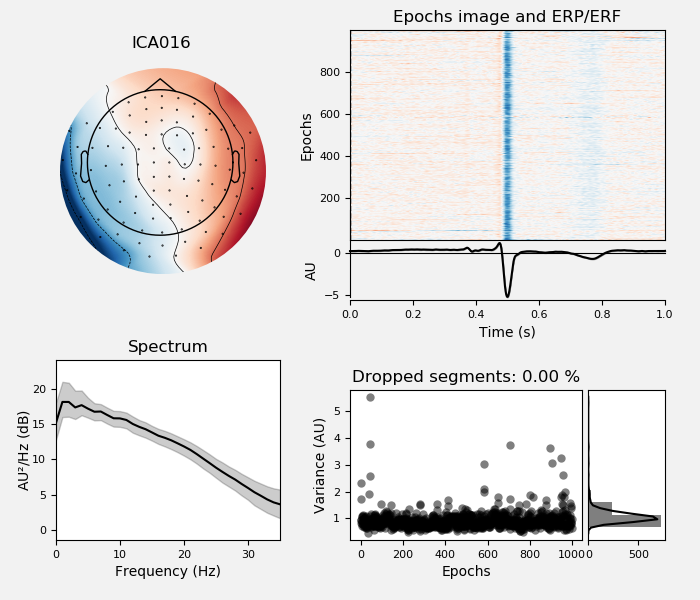

    Using multitaper spectrum estimation with 7 DPSS windows
999 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


In [32]:
properties_ecg = ica.plot_properties(ecg_epochs, picks=ecg_inds, psd_args={'fmax': 35.});

Transforming to ICA space (69 components)
Zeroing out 1 ICA component


<IPython.core.display.Javascript object>


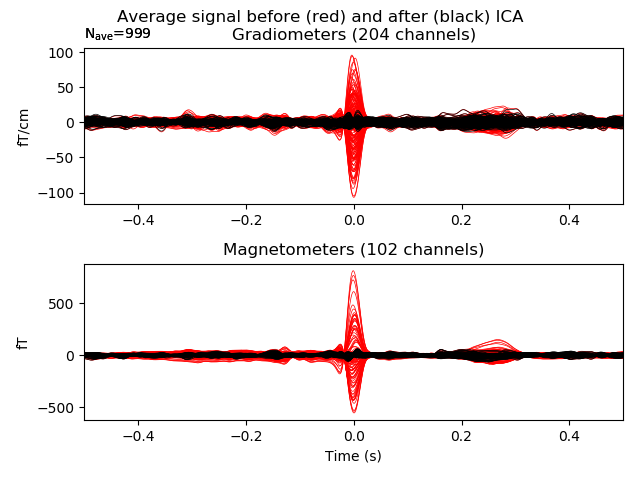

In [33]:
ecg_average = ecg_epochs.average()
overlay_ecg = ica.plot_overlay(ecg_average, exclude=ecg_inds, show=False);

If we want drop components only for blinking and heart beats, for example, we can take numbers of this components from ica.labels_

In [34]:
eog_comp = ica.labels_['eog/0/EOG061']
ecg_comp = ica.labels_['ecg']
comp_drop = eog_comp + ecg_comp
comp_drop

[9, 16]

In [37]:
raw_ica = raw.copy()
ica.apply(raw_ica, exclude = comp_drop)
raw_ica.save('/home/vtretyakova/Desktop/New_experiment/raw_ica_L001_d1p1.fif', overwrite=True)

Transforming to ICA space (69 components)
Zeroing out 2 ICA components
Writing /home/vtretyakova/Desktop/New_experiment/raw_ica_L001_d1p1.fif


<ipython-input-37-ba11db692c92>:3: RuntimeWarning: This filename (/home/vtretyakova/Desktop/New_experiment/raw_ica_L001_d1p1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw_ica.save('/home/vtretyakova/Desktop/New_experiment/raw_ica_L001_d1p1.fif', overwrite=True)


Closing /home/vtretyakova/Desktop/New_experiment/raw_ica_L001_d1p1.fif [done]


### Good luck with ICA! :)